## Nama : Nabilah Selayanti
## Asal   : UPN "Veteran" Jawa Timur
## Prodi : Sains Data

# 1. Load Data

In [1]:
import pandas as pd
data = pd.read_excel("D:/COLLEGE/MAGANG/DETIK ASSIGNMENT/Assignment Data Analyst MSIB Batch 7.xlsx")
data

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233
...,...,...,...,...,...,...,...
151,facebook / cpc,"Edan, Ponsel Ini Punya Baterai 13.000 mAh",198.0,76.923077,215.0,1.837607,101.685393
152,facebook / cpc,Gempa Keras di Jakarta Terasa Lebih dari 1 Menit,180.0,20.000000,215.0,2.388889,233.640000
153,facebook / cpc,Jennifer Dunn dan Deretan Mobil Mewahnya,180.0,100.000000,215.0,23.888889,97.836735
154,facebook / cpc,Kasus Salah Baca Xiaomi Terulang Kembali,180.0,83.333333,215.0,1.990741,178.449438


# 2. Data Understanding

In [2]:
# cek informasi data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ga:sourceMedium         156 non-null    object 
 1   ga:pageTitle            156 non-null    object 
 2   ga:users                155 non-null    float64
 3   ga:bounceRate           155 non-null    float64
 4   ga:pageviews            155 non-null    float64
 5   ga:pageviewsPerSession  155 non-null    float64
 6   ga:avgTimeOnPage        155 non-null    float64
dtypes: float64(5), object(2)
memory usage: 8.7+ KB


In [3]:
# cek missing value
data.isnull().sum()

ga:sourceMedium           0
ga:pageTitle              0
ga:users                  1
ga:bounceRate             1
ga:pageviews              1
ga:pageviewsPerSession    1
ga:avgTimeOnPage          1
dtype: int64

In [4]:
# mengecek baris yang memiliki missing valu
missing_rows = data[data.isna().any(axis=1)]
missing_rows

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
155,facebook / cpc,Netizen Ramai Teriakkan,NaN,NaN,NaN,NaN,NaN


In [5]:
# karena yang missing value ada satu baris, maka  bahwa baris tersebut dihapus karena seluruh kolomnya mengandung missing values, 
# dan penghapusan satu baris tidak akan mengurangi integritas dataset.
data.drop(155,  inplace=True)

In [6]:
# statistika deskriptif
data.describe()

,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage
count,155.000000,155.000000,155.000000,155.000000,155.000000
mean,1995.722581,31.925982,3607.174194,16.204284,75.428357
std,6449.314679,36.030184,11845.050364,32.522916,77.975259
min,9.000000,0.000000,215.000000,0.000000,2.814915
25%,108.000000,0.000000,287.000000,0.000000,16.948403
50%,233.000000,17.070773,431.000000,2.353535,44.720930
75%,458.000000,62.401881,826.000000,22.194444,109.392803
max,43893.000000,100.000000,83593.000000,268.833333,449.897196


# 3. Statistika Deskriptif
bertujuan untuk memberikan gambaran umum tentang karakteristik data yang akan dianalisis lebih lanjut.

### - Frekuensi tiap Sumber/Media 

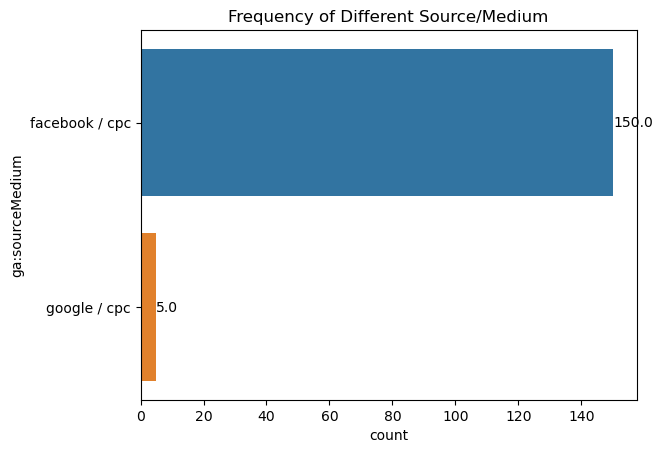

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt

# Menggambar bar chart
ax = sns.countplot(y='ga:sourceMedium', data=data, order=data['ga:sourceMedium'].value_counts().index)
plt.title('Frequency of Different Source/Medium')

# Menambahkan angka di atas setiap bar
for p in ax.patches:
    width = p.get_width() 
    ax.text(width + 0.05, p.get_y() + p.get_height()/2, f'{width}', 
            ha='left', va='center', fontsize=10)
plt.show()

### - Presentase untuk 'ga:sourceMedium'

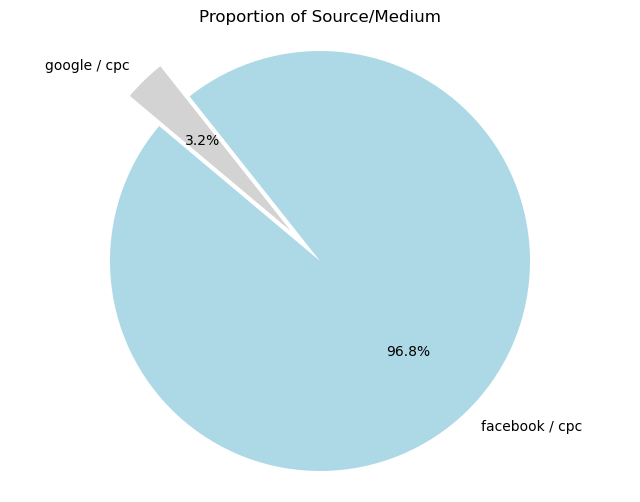

In [8]:
source_medium_counts = data['ga:sourceMedium'].value_counts()
labels = source_medium_counts.index
sizes = source_medium_counts.values
colors = ['lightblue', 'lightgrey']  
explode = [0.1] * len(labels) 

plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Source/Medium')
plt.axis('equal') 
plt.show()

### - Top 5 Most Viewed Pages

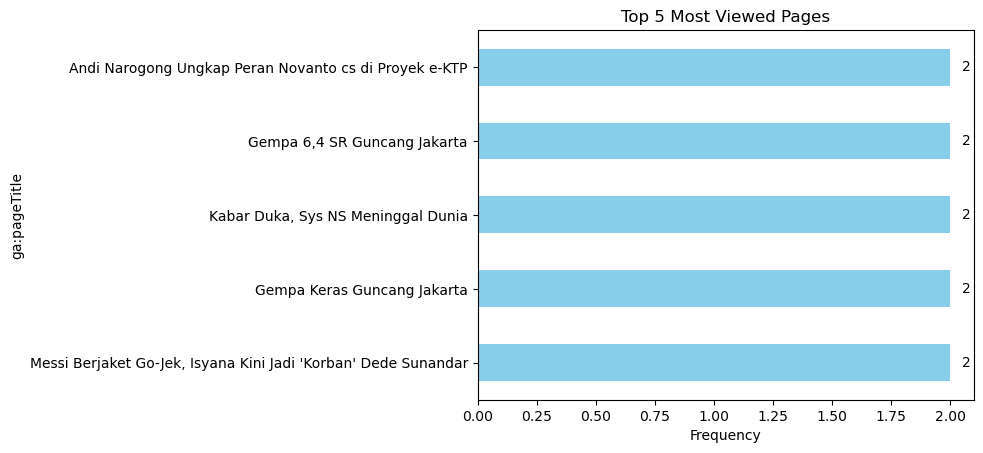

In [9]:
# Mengambil 5 halaman teratas berdasarkan jumlah tampilan
top_pages = data['ga:pageTitle'].value_counts().nlargest(5)

# Menggambar bar chart horizontal
ax = top_pages.plot(kind='barh', color='skyblue')
plt.title('Top 5 Most Viewed Pages')
plt.xlabel('Frequency')

# Menambahkan angka di atas setiap bar
for index, value in enumerate(top_pages):ax.text(value + 0.05, index, f'{value}', va='center', fontsize=10)
plt.show()

### - Mengurutkan data berdasarkan 'ga:users' secara menurun dan memilih 5 teratas

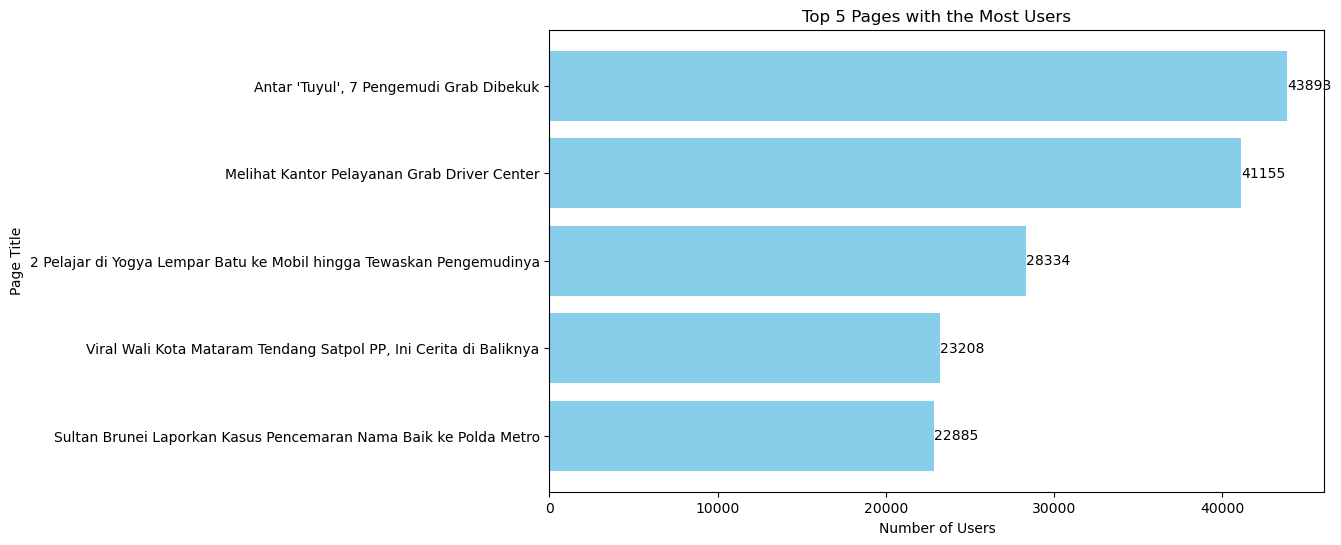

In [10]:
top_5_pages = data.nlargest(5, 'ga:users')[['ga:pageTitle', 'ga:users']]

plt.figure(figsize=(10, 6))
bars = plt.barh(top_5_pages['ga:pageTitle'], top_5_pages['ga:users'], color='skyblue')
plt.xlabel('Number of Users')
plt.ylabel('Page Title')
plt.title('Top 5 Pages with the Most Users')
plt.gca().invert_yaxis() 

# Menambahkan angka di atas setiap bar
for bar in bars:
    width = bar.get_width()
    plt.text(width, bar.get_y() + bar.get_height() / 2, f'{width:.0f}', 
             va='center', ha='left', color='black')
plt.show()

### - Korelasi Data

Index(['ga:users', 'ga:bounceRate', 'ga:pageviews', 'ga:pageviewsPerSession',
       'ga:avgTimeOnPage'],
      dtype='object')


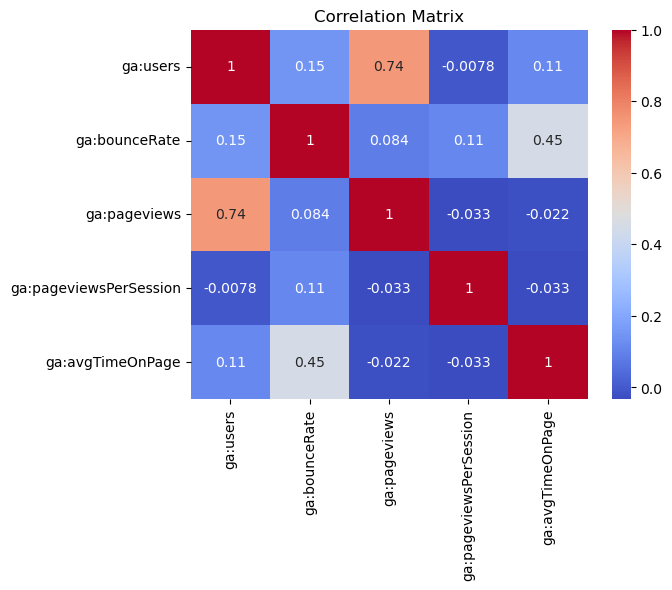

In [11]:
# Pisahkan data numerik
numerical_data = data.select_dtypes(include=['float64', 'int64'])

# Cek jika ada variabel yang tidak numerik dalam numerik_data
print(numerical_data.columns)

# Hitung korelasi
correlation_matrix = numerical_data.corr()

# Plot heatmap korelasi
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

# 4. Pemodelan Random Forest Regression

### • Import library yang diperlukan

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

### • Fungsi untuk ekstraksi fitur dari judul
Mengubah teks judul halaman (ga:pageTitle) menjadi fitur numerik atau kategorikal yang dapat digunakan dalam analisis atau model. Ini bisa termasuk panjang judul, jumlah kata, kehadiran kata kunci tertentu, dan sebagainya.


In [14]:
def extract_title_features(title):
    return {
        'title_length': len(title),
        'has_number': int(any(char.isdigit() for char in title)),
        'exclamation_mark': title.count('!')
    }

# Aplikasikan fungsi ekstraksi fitur
title_features = data['ga:pageTitle'].apply(extract_title_features).apply(pd.Series)
df = pd.concat([data, title_features], axis=1)
df

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage,title_length,has_number,exclamation_mark
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",13736.0,19.269967,83593.0,6.042140,21.790189,73,0,0
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,15909.0,62.303763,74032.0,4.612011,16.330553,70,1,1
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",7748.0,30.934520,54657.0,6.949396,21.429338,58,0,0
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",43893.0,6.966219,47924.0,1.106560,5.056397,39,1,0
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,41155.0,11.630219,44072.0,43.809145,180.944233,43,0,0
...,...,...,...,...,...,...,...,...,...,...
150,facebook / cpc,Ungkapan Duka Cita Untuk Sys NS Deras di Insta...,153.0,0.000000,224.0,0.000000,109.847059,50,0,0
151,facebook / cpc,"Edan, Ponsel Ini Punya Baterai 13.000 mAh",198.0,76.923077,215.0,1.837607,101.685393,41,1,0
152,facebook / cpc,Gempa Keras di Jakarta Terasa Lebih dari 1 Menit,180.0,20.000000,215.0,2.388889,233.640000,48,1,0
153,facebook / cpc,Jennifer Dunn dan Deretan Mobil Mewahnya,180.0,100.000000,215.0,23.888889,97.836735,40,0,0


### • Standrarisasi

In [118]:
# Daftar fitur numerik yang akan distandarisasi
numeric_features = ['ga:users', 'ga:bounceRate', 'ga:pageviews', 'ga:pageviewsPerSession', 'ga:avgTimeOnPage']

# Membuat instance StandardScaler
scaler = StandardScaler()

# Melakukan standarisasi pada fitur numerik
df[numeric_features] = scaler.fit_transform(df[numeric_features])

# Menampilkan hasil standarisasi
df

,ga:sourceMedium,ga:pageTitle,ga:users,ga:bounceRate,ga:pageviews,ga:pageviewsPerSession,ga:avgTimeOnPage,title_length,has_number,exclamation_mark
0,facebook / cpc,"Bikin Lambe Turah Diomelin, Nih Si Seksi yang ...",1.826292,-0.352400,6.774568,-0.313474,-0.690117,73,0,0
1,facebook / cpc,Heboh! Kiki Farel Transfer Uang Jajan Rp 1 Jut...,2.164319,0.845853,5.964779,-0.357589,-0.760361,70,1,1
2,facebook / cpc,"Tak Sesuai Harapan, Barang Belanja Online Ini ...",0.894812,-0.027607,4.323773,-0.285488,-0.694760,58,0,0
3,facebook / cpc,"Antar 'Tuyul', 7 Pengemudi Grab Dibekuk",6.517450,-0.694991,3.753507,-0.465723,-0.905416,39,1,0
4,facebook / cpc,Melihat Kantor Pelayanan Grab Driver Center,6.091533,-0.565125,3.427254,0.851533,1.357583,43,0,0
...,...,...,...,...,...,...,...,...,...,...
150,facebook / cpc,Ungkapan Duka Cita Untuk Sys NS Deras di Insta...,-0.286650,-0.888962,-0.286545,-0.499857,0.442836,50,0,0
151,facebook / cpc,"Edan, Ponsel Ini Punya Baterai 13.000 mAh",-0.279650,1.252920,-0.287307,-0.443172,0.337827,41,1,0
152,facebook / cpc,Gempa Keras di Jakarta Terasa Lebih dari 1 Menit,-0.282450,-0.332073,-0.287307,-0.426166,2.035575,48,1,0
153,facebook / cpc,Jennifer Dunn dan Deretan Mobil Mewahnya,-0.282450,1.895485,-0.287307,0.237049,0.288310,40,0,0


### • Memilih fitur dan target

In [17]:
# ingin memprediksi 'ga:pageviewsPerSession'
X = df.drop(['ga:pageviews'], axis=1)
y = df['ga:pageviews']

### • Buat preprocessor

In [18]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), ['title_length', 'ga:users', 'ga:bounceRate']),
        ('cat', OneHotEncoder(drop='first', sparse_output=False), ['ga:sourceMedium'])
    ])

### • Buat pipeline

In [76]:
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42))
])

## > Split Data rasio 80 : 20

In [77]:
# 8. Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 9. Latih model
model.fit(X_train, y_train)

# 10. Prediksi
y_pred = model.predict(X_test)

# 11. Evaluasi model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R-squared Score: {r2:.3f}")

Mean Squared Error: 0.023
Mean Absolute Error: 0.044
R-squared Score: 0.804


## > Split Data rasio 70 : 30

In [78]:
# 8. Split data
X_train_73, X_test_73, y_train_73, y_test_73 = train_test_split(X, y, test_size=0.3, random_state=42)

# 9. Latih model
model.fit(X_train_73, y_train_73)

# 10. Prediksi
y_pred_73 = model.predict(X_test_73)

# 11. Evaluasi model
mse_73 = mean_squared_error(y_test_73, y_pred_73)
mae_73 = mean_absolute_error(y_test_73, y_pred_73)
r2_73 = r2_score(y_test_73, y_pred_73)

print(f"Mean Squared Error: {mse_73:.3f}")
print(f"Mean Absolute Error: {mae_73:.3f}")
print(f"R-squared Score: {r2_73:.3f}")

Mean Squared Error: 0.049
Mean Absolute Error: 0.065
R-squared Score: 0.394


## > Split Data rasio 60 : 40

In [79]:
# 8. Split data
X_train_64, X_test_64, y_train_64, y_test_64 = train_test_split(X, y, test_size=0.4, random_state=42)

# 9. Latih model
model.fit(X_train_64, y_train_64)

# 10. Prediksi
y_pred = model.predict(X_test_64)

# 11. Evaluasi model
mse = mean_squared_error(y_test_64, y_pred)
mae = mean_absolute_error(y_test_64, y_pred)
r2 = r2_score(y_test_64, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R-squared Score: {r2:.3f}")

Mean Squared Error: 0.044
Mean Absolute Error: 0.072
R-squared Score: 0.863


## > Split Data rasio 75 : 25

In [80]:
# 8. Split data
X_train_75, X_test_75, y_train_75, y_test_75 = train_test_split(X, y, test_size=0.25, random_state=42)

# 9. Latih model
model.fit(X_train_75, y_train_75)

# 10. Prediksi
y_pred = model.predict(X_test_75)

# 11. Evaluasi model
mse = mean_squared_error(y_test_75, y_pred)
mae = mean_absolute_error(y_test_75, y_pred)
r2 = r2_score(y_test_75, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R-squared Score: {r2:.3f}")

Mean Squared Error: 0.013
Mean Absolute Error: 0.037
R-squared Score: 0.863


# 5.  Tuning Parameter Menggunakan library GridSearchCV

## • Turning Parameter pada split rasio 80:20

In [81]:
# Define parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300, 400, 500],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", -grid_search.best_score_)

Best parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 300}
Best cross-validation score: 0.23621333098157143


In [82]:
# Use best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Evaluate
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 0.021
Mean Absolute Error (MAE): 0.046
R-squared (R²): 0.818


## • Turning Parameter pada split rasio 70 : 30

In [83]:
# Define parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300, 400, 500],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_73, y_train_73)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", -grid_search.best_score_)

Best parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 500}
Best cross-validation score: 0.2638409890842247


In [84]:
# Use best model for prediction
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_73)

# Evaluate
mse = mean_squared_error(y_test_73, y_pred)
mae = mean_absolute_error(y_test_73, y_pred)
r2 = r2_score(y_test_73, y_pred)
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"R-squared (R²): {r2:.3f}")

Mean Squared Error (MSE): 0.048
Mean Absolute Error (MAE): 0.065
R-squared (R²): 0.407


## • Turning Parameter pada split rasio 60 : 40

In [93]:
# Define parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300, 400, 500],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_64, y_train_64)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", -grid_search.best_score_)

Best parameters: {'regressor__max_depth': None, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
Best cross-validation score: 0.2697092365955429


In [94]:
# Mengambil model terbaik dari GridSearchCV
best_model_64 = grid_search.best_estimator_
y_pred = best_model_64.predict(X_test_64)

# 11. Evaluasi model
mse = mean_squared_error(y_test_64, y_pred)
mae = mean_absolute_error(y_test_64, y_pred)
r2 = r2_score(y_test_64, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R-squared Score: {r2:.3f}")

Mean Squared Error: 0.046
Mean Absolute Error: 0.074
R-squared Score: 0.857


## • Turning Parameter pada split rasio 75 : 25

In [87]:
# Define parameter grid for GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200, 300, 400, 500],
    'regressor__max_depth': [None, 10, 20, 30],
    'regressor__min_samples_split': [2, 5, 10],
    'regressor__min_samples_leaf': [1, 2, 4]
}

# Perform GridSearchCV
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train_75, y_train_75)

# Print best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score:", -grid_search.best_score_)

Best parameters: {'regressor__max_depth': 10, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 50}
Best cross-validation score: 0.1993585168458405


In [119]:
# Mengambil model terbaik dari GridSearchCV
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test_75)

# 11. Evaluasi model
mse = mean_squared_error(y_test_75, y_pred)
mae = mean_absolute_error(y_test_75, y_pred)
r2 = r2_score(y_test_75, y_pred)

print(f"Mean Squared Error: {mse:.3f}")
print(f"Mean Absolute Error: {mae:.3f}")
print(f"R-squared Score: {r2:.3f}")

Mean Squared Error: 0.039
Mean Absolute Error: 0.064
R-squared Score: 0.579


## Feature Importance rasio split 60 : 40
Dari hasil evaluasi, rekomendasi yang paling baik adalah menggunakan Rasio 60:40 karena memberikan hasil yang paling baik dengan R-squared Score sebesar 0.857 dan Mean Absolute Error sebesar 0.074.


Feature Importances:
                        feature    importance
1                      ga:users  8.484942e-01
0                  title_length  1.201515e-01
2                 ga:bounceRate  3.135419e-02
3  ga:sourceMedium_google / cpc  4.274285e-08


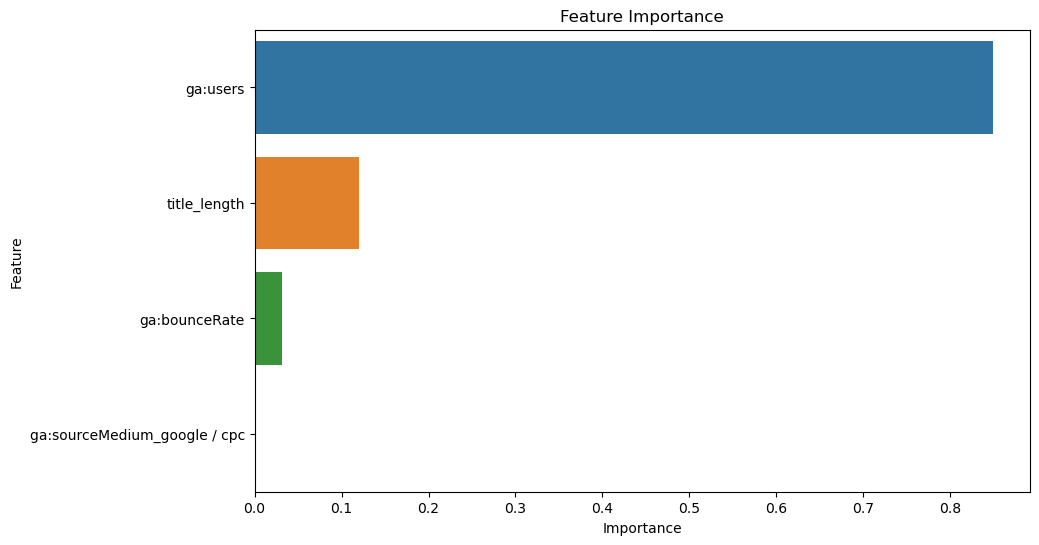

In [96]:
# Analisis feature importance
feature_names = (best_model_64.named_steps['preprocessor'].named_transformers_['num'].get_feature_names_out().tolist() +
                 best_model_64.named_steps['preprocessor'].named_transformers_['cat'].get_feature_names_out().tolist())
importances = best_model_64.named_steps['regressor'].feature_importances_
feature_importance_64 = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_64 = feature_importance_64.sort_values('importance', ascending=False)

print("\nFeature Importances:")
print(feature_importance_64)

# Plot pentingnya fitur
plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance_64)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()